# Accessibility to Public Services: Ecuador Case

In [1]:
import geopandas as gpd #Para archivos .shp 
import matplotlib.pyplot as plt #Para gráficar 
#Se define el tamaño de salidad de las gráficas

import numpy as np 
import pandas as pd

from shapely import wkt
import geopy.distance
from math import radians, cos, sin, asin, sqrt

from pandas.core.frame import DataFrame
from functools import reduce
import pyproj as pp
from pyproj import Proj


from pylab import rcParams 
rcParams['figure.figsize'] = 30,30

import warnings
warnings.filterwarnings('ignore')

## Handle spatial data of beneficiaries of non-contributory monetary transfers in Quito - MIES

In [2]:
#Database from MIES

# BDH and others pensions 
df_1 = pd.read_excel("https://info.inclusion.gob.ec/images/usuarios_externos/2023/bonos_pensiones_ago2023.xlsx", sheet_name= "PARTE 1 AGO2023",dtype={'dpa_prov': str})
df_2 = pd.read_excel("https://info.inclusion.gob.ec/images/usuarios_externos/2023/bonos_pensiones_ago2023.xlsx", sheet_name= "PARTE 2 AGO2023")
df_MIES = pd.concat([df_1, df_2], ignore_index=True)

df_ben = df_MIES.groupby(['dpa_desprov','beneficio'])['beneficio'].count().reset_index(name='Total_beneficiarios')
df_ben


,dpa_desprov,beneficio,Total_beneficiarios
0,AZUAY,BONO 1000 DIAS,1731
1,AZUAY,BONO DE DESARROLLO HUMANO,25914
2,AZUAY,BONO DE DESARROLLO HUMANO CON COMPONENTE VARIABLE,8903
3,AZUAY,BONO JOAQUIN GALLEGOS LARA,1280
4,AZUAY,PENSION MIS MEJORES AÑOS,14056
...,...,...,...
193,ZONA EN ESTUDIO,BONO DE DESARROLLO HUMANO CON COMPONENTE VARIABLE,427
194,ZONA EN ESTUDIO,PENSION MIS MEJORES AÑOS,423
195,ZONA EN ESTUDIO,PENSION PARA ADULTOS MAYORES,1
196,ZONA EN ESTUDIO,PENSION PARA PERSONAS CON DISCAPACIDAD,1


In [12]:
df_MIES_Quito = df_MIES[df_MIES['dpa_descan']=='DISTRITO METROPOLITANO DE QUITO']
df_MIES_Quito.head()

,zon_plan,uni_des_mi,dpa_prov,dpa_desprov,dpa_can,dpa_descan,dpa_par,dpa_despar,beneficio,edad,x,y,corte
320,Zona Planificación: Quito,UNIDAD DESCONCENTRADA DISTRITAL TIPO B QUITO SUR,17,PICHINCHA,1701,DISTRITO METROPOLITANO DE QUITO,170162,GUANGOPOLO,PENSION MIS MEJORES AÑOS,94.0,-78.453238,-0.259818,ago 2023
424,Zona Planificación: Quito,UNIDAD DESCONCENTRADA DISTRITAL TIPO B QUITO C...,17,PICHINCHA,1701,DISTRITO METROPOLITANO DE QUITO,170150,QUITO,PENSION MIS MEJORES AÑOS,83.0,-78.467887,-0.126370,ago 2023
461,Zona Planificación: Quito,UNIDAD DESCONCENTRADA DISTRITAL TIPO B QUITO SUR,17,PICHINCHA,1701,DISTRITO METROPOLITANO DE QUITO,170111,GUAMANÍ,BONO JOAQUIN GALLEGOS LARA,95.0,-78.561417,-0.324848,ago 2023
985,Zona Planificación: Quito,UNIDAD DESCONCENTRADA DISTRITAL TIPO B QUITO C...,17,PICHINCHA,1701,DISTRITO METROPOLITANO DE QUITO,170150,QUITO,PENSION MIS MEJORES AÑOS,76.0,-78.561565,-0.334326,ago 2023
1119,Zona Planificación: Quito,UNIDAD DESCONCENTRADA DISTRITAL TIPO B QUITO C...,17,PICHINCHA,1701,DISTRITO METROPOLITANO DE QUITO,170150,QUITO,PENSION MIS MEJORES AÑOS,75.0,-78.571653,-0.330162,ago 2023


<Axes: >

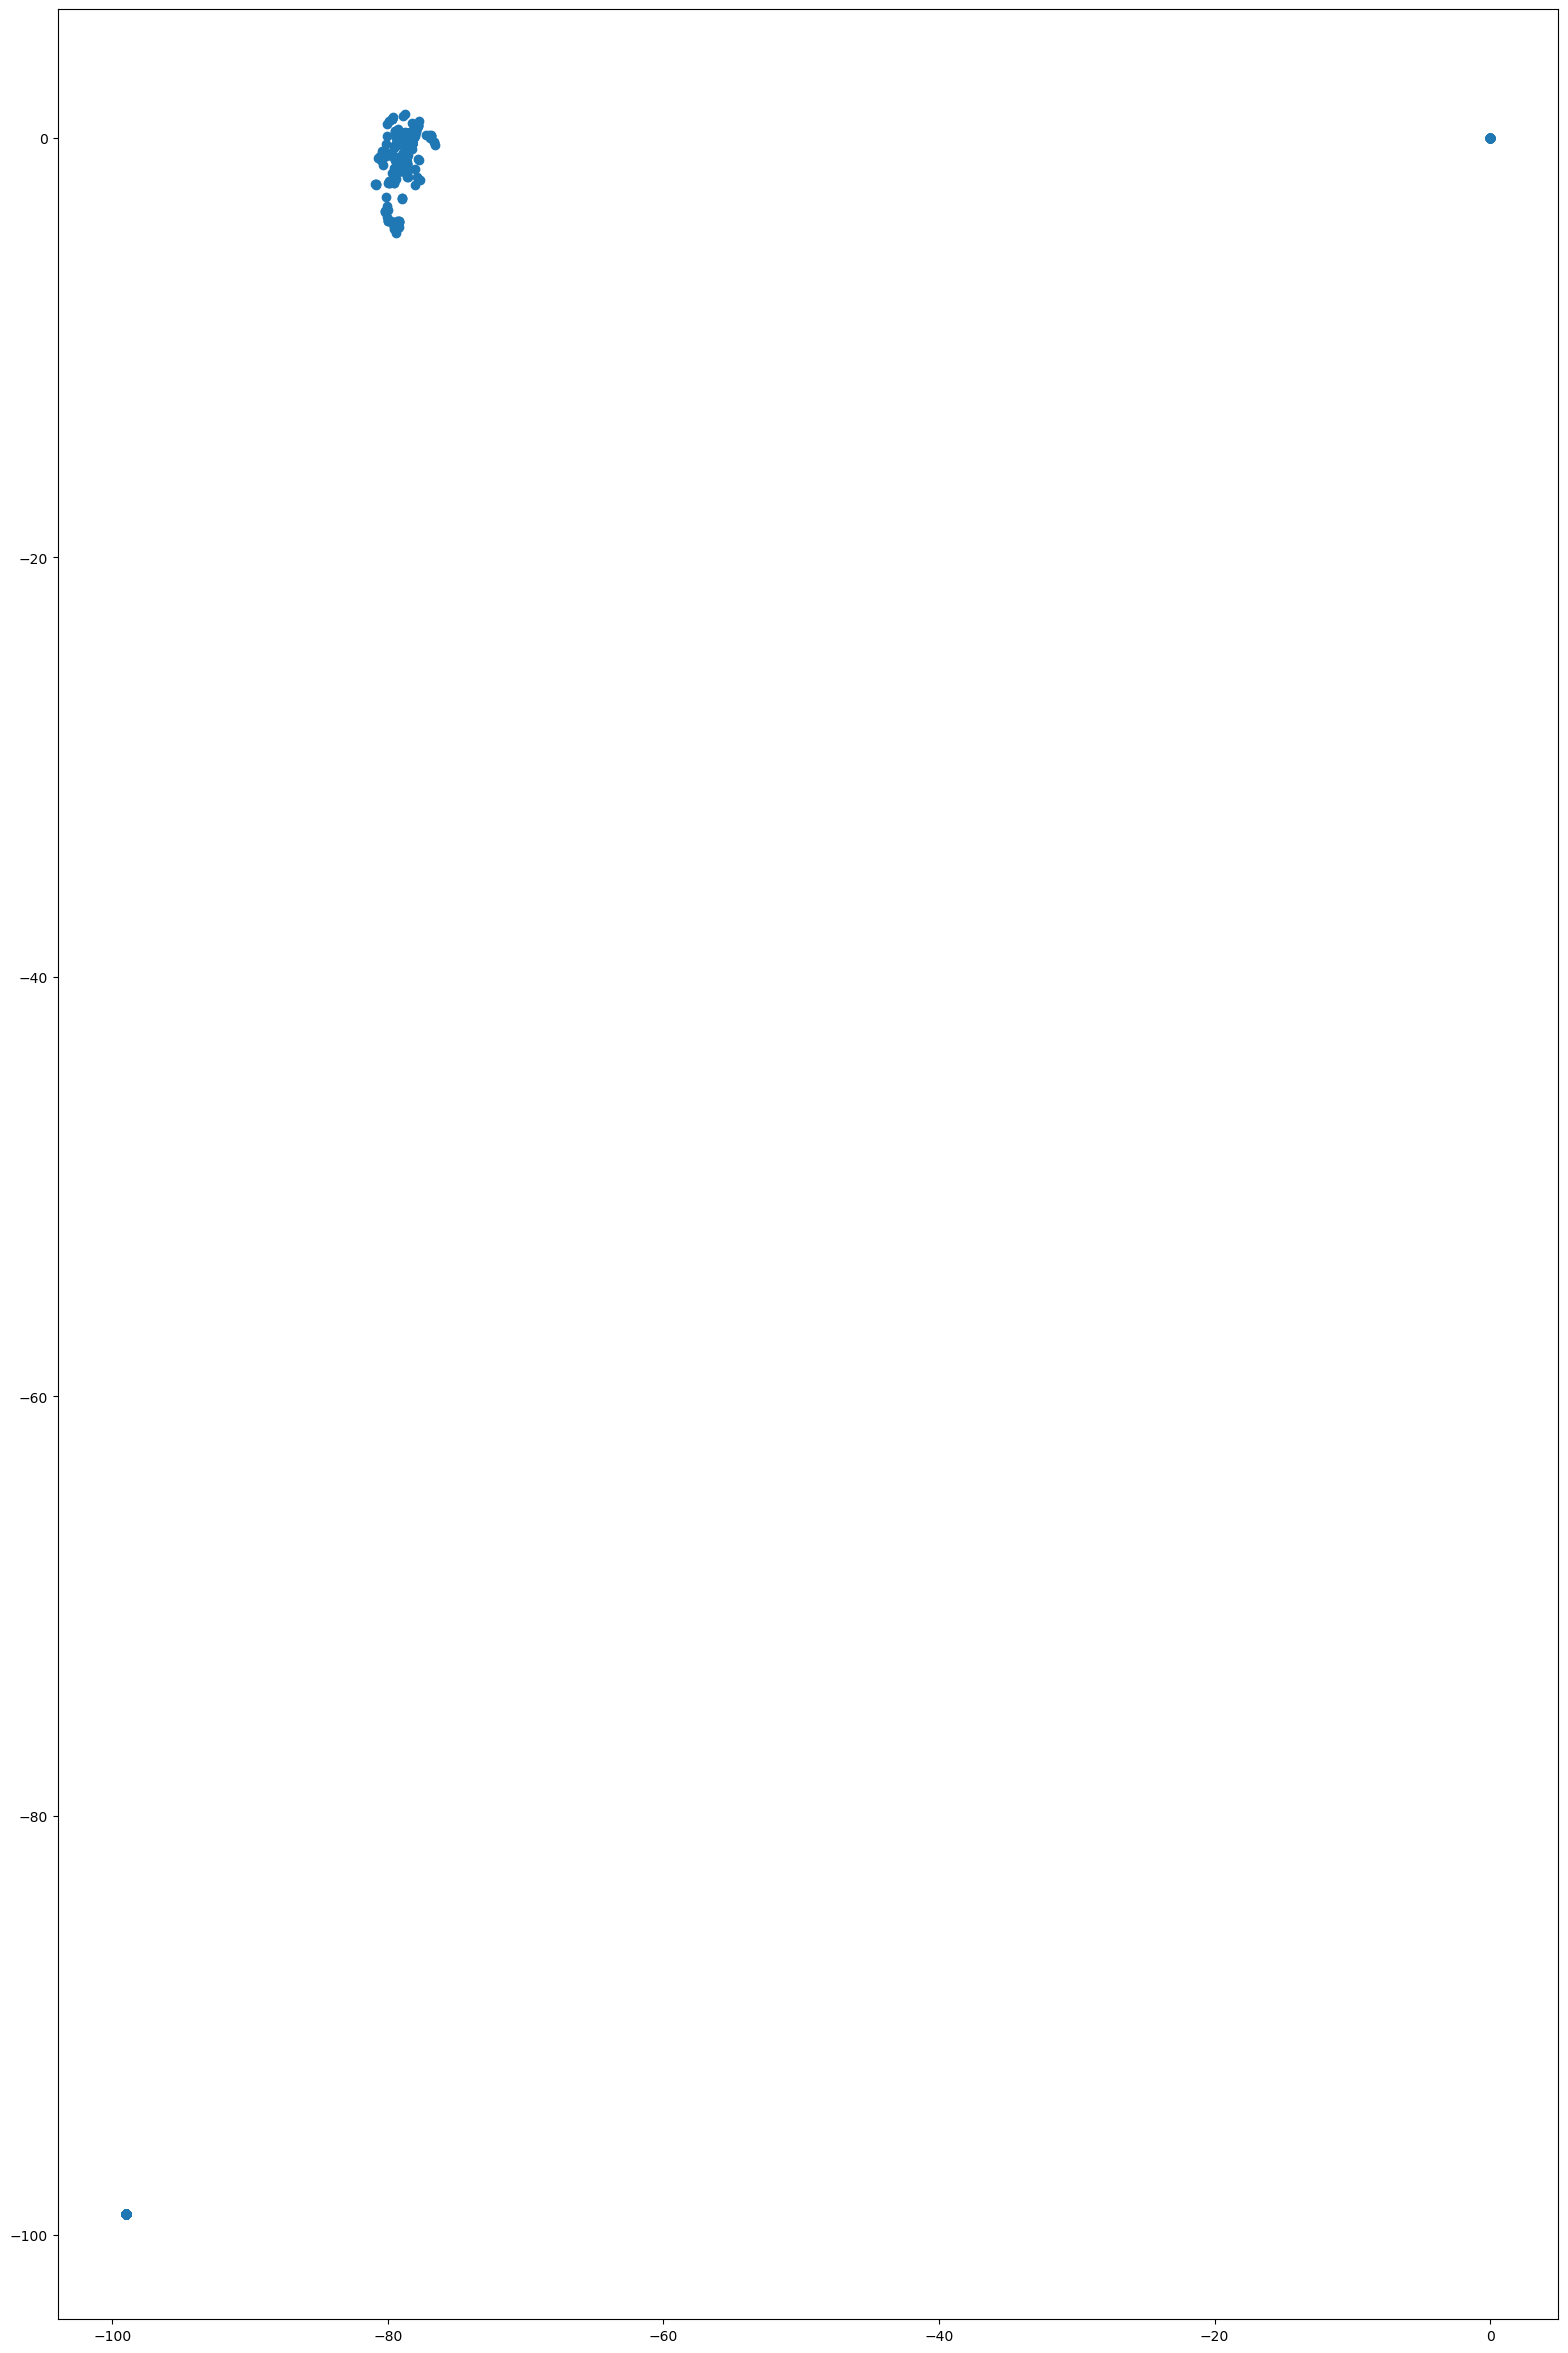

In [13]:
# Convert  MIES´s Database to spatial format "EPSG:4326"

df_MIES_Quito.dropna(subset=['x', 'y'], inplace= True)

df_MIES_gdf= gpd.GeoDataFrame(df_MIES_Quito, geometry= gpd.points_from_xy(df_MIES_Quito['x'],df_MIES_Quito['y']))
df_MIES_gdf['geometry'] = df_MIES_gdf['geometry'].astype(str).apply(wkt.loads)
gdf_hog = gpd.GeoDataFrame(df_MIES_gdf)

gdf_hog = gdf_hog.set_crs("EPSG:4326")
gdf_hog.plot()